In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user_details = pd.read_excel(r'D:\upliance.ai\Data Analyst Intern Assignment - Excel.xlsx', sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(r'D:\upliance.ai\Data Analyst Intern Assignment - Excel.xlsx', sheet_name='CookingSessions.csv')
order_details = pd.read_excel(r'D:\upliance.ai\Data Analyst Intern Assignment - Excel.xlsx', sheet_name='OrderDetails.csv')

In [3]:
user_details.drop_duplicates(inplace=True)
cooking_sessions.drop_duplicates(inplace=True)
order_details.drop_duplicates(inplace=True)

In [4]:
# Check for missing values
missing_values = {
    'UserDetails': user_details.isnull().sum(),
    'CookingSessions': cooking_sessions.isnull().sum(),
    'OrderDetails': order_details.isnull().sum()
}

# Check for duplicates
duplicates = {
    'UserDetails': user_details.duplicated().sum(),
    'CookingSessions': cooking_sessions.duplicated().sum(),
    'OrderDetails': order_details.duplicated().sum()
}

missing_values, duplicates

({'UserDetails': User ID              0
  User Name            0
  Age                  0
  Location             0
  Registration Date    0
  Phone                0
  Email                0
  Favorite Meal        0
  Total Orders         0
  dtype: int64,
  'CookingSessions': Session ID         0
  User ID            0
  Dish Name          0
  Meal Type          0
  Session Start      0
  Session End        0
  Duration (mins)    0
  Session Rating     0
  dtype: int64,
  'OrderDetails': Order ID        0
  User ID         0
  Order Date      0
  Meal Type       0
  Dish Name       0
  Order Status    0
  Amount (USD)    0
  Time of Day     0
  Rating          2
  Session ID      0
  dtype: int64},
 {'UserDetails': 0, 'CookingSessions': 0, 'OrderDetails': 0})

In [5]:
user_details.fillna(method='ffill', inplace=True)  # Example: forward fill
cooking_sessions.dropna(subset=['Dish Name'], inplace=True)  # Drop if Dish Name is missing
order_details.fillna(0, inplace=True)  # Fill missing amounts with 0

In [6]:
user_details['Registration Date'] = pd.to_datetime(user_details['Registration Date'])
cooking_sessions['Session Start'] = pd.to_datetime(cooking_sessions['Session Start'])
cooking_sessions['Session End'] = pd.to_datetime(cooking_sessions['Session End'])
order_details['Order Date'] = pd.to_datetime(order_details['Order Date'])

In [7]:
anomalies = {
    'Negative Durations': cooking_sessions[cooking_sessions['Duration (mins)'] < 0],
    'Invalid Ratings': cooking_sessions[cooking_sessions['Session Rating'] < 0]
}

# Merging Datasets

In [8]:

#Merge the datasets on appropriate keys (User ID, Session ID).
merged_data = pd.merge(order_details, cooking_sessions, on='User ID', how='left')
merged_data = pd.merge(merged_data, user_details, on='User ID', how='left')

In [9]:
#Check for any missing values in the merged dataset.
merged_data.isnull().sum()

Order ID             0
User ID              0
Order Date           0
Meal Type_x          0
Dish Name_x          0
Order Status         0
Amount (USD)         0
Time of Day          0
Rating               0
Session ID_x         0
Session ID_y         0
Dish Name_y          0
Meal Type_y          0
Session Start        0
Session End          0
Duration (mins)      0
Session Rating       0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64

# Exploratory Data Analysis

a) User Demographics Analysis

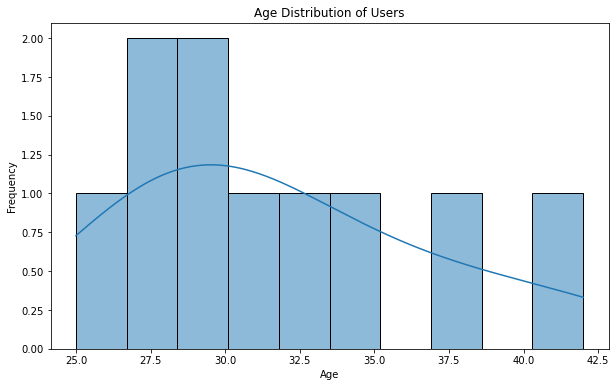

In [10]:
#Age Distribution
#Plot age distribution using a histogram.

plt.figure(figsize=(10, 6))
sns.histplot(user_details['Age'], bins=10, kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

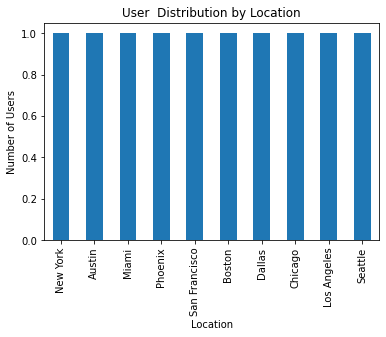

In [11]:
#Geographical Distribution
#Create a bar chart of users by location.

location_counts = user_details['Location'].value_counts()
location_counts.plot(kind='bar')
plt.title('User  Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Number of Users')
plt.show()

b) Cooking Behavior Analysis

In [12]:
#Average Cooking Session Duration
#Calculate and display the average duration.

average_duration = cooking_sessions['Duration (mins)'].mean()
average_duration

30.3125

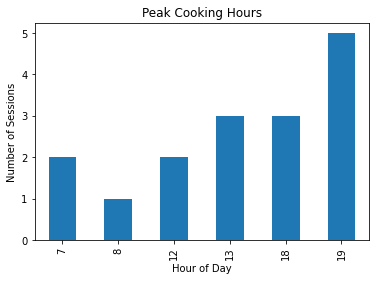

In [13]:
#Peak Cooking Times
#Analyze session start times to find peak hours.

cooking_sessions['Hour'] = cooking_sessions['Session Start'].dt.hour
peak_hours = cooking_sessions['Hour'].value_counts().sort_index()
peak_hours.plot(kind='bar')
plt.title('Peak Cooking Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Sessions')
plt.show()

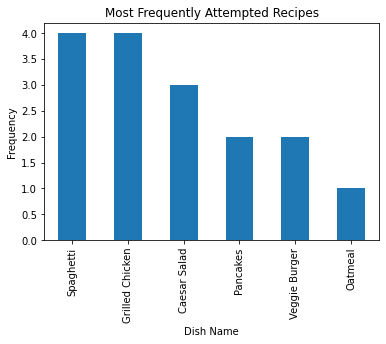

In [14]:
#Most Frequently Attempted Recipes
#Identify the top recipes.

top_recipes = cooking_sessions['Dish Name'].value_counts().head(10)
top_recipes.plot(kind='bar')
plt.title('Most Frequently Attempted Recipes')
plt.xlabel('Dish Name')
plt.ylabel('Frequency')
plt.show()

In [15]:
#Completion Rates of Cooking Sessions
#Calculate the completion rate based on session ratings.

completion_rate = (cooking_sessions['Session Rating'] >= 3).mean()  # Assuming 3 is the threshold for completion
completion_rate

1.0

c) Order Pattern Analysis

In [16]:
#Order Frequency per User
#Calculate the number of orders per user.

order_frequency = order_details['User ID'].value_counts()
order_frequency

U002    3
U001    3
U003    3
U005    2
U004    2
U007    1
U008    1
U006    1
Name: User ID, dtype: int64

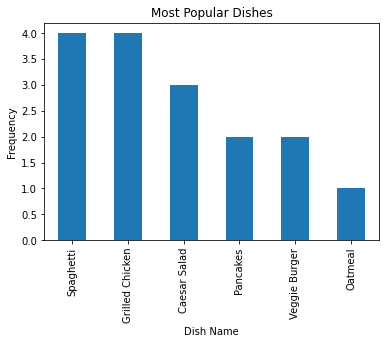

In [17]:
#Popular Dishes and Cuisine Types
#Identify the most ordered dishes and cuisines.

popular_dishes = order_details['Dish Name'].value_counts().head(10)
popular_dishes.plot (kind='bar')
plt.title('Most Popular Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Frequency')
plt.show()

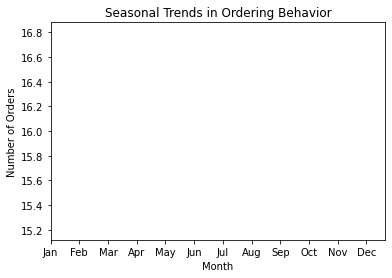

In [18]:
#Seasonal Trends in Ordering Behavior
#Analyze orders by month to identify trends.

order_details['Month'] = order_details['Order Date'].dt.month
seasonal_trends = order_details.groupby('Month')['Order ID'].count()
seasonal_trends.plot(kind='line')
plt.title('Seasonal Trends in Ordering Behavior')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [19]:
#Average Order Value and Frequency
#Calculate average order value and frequency.

average_order_value = order_details['Amount (USD)'].mean()
order_frequency_per_user = order_details.groupby('User ID')['Order ID'].count().mean()

# Relationship Analysis

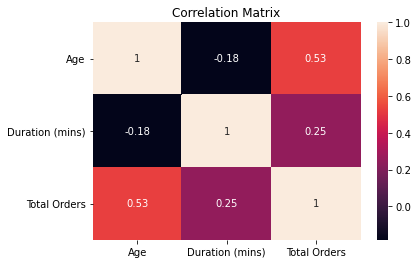

In [20]:
#Correlations
#Investigate correlations between demographic factors and cooking preferences.

correlation_matrix = merged_data[['Age', 'Duration (mins)', 'Total Orders']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

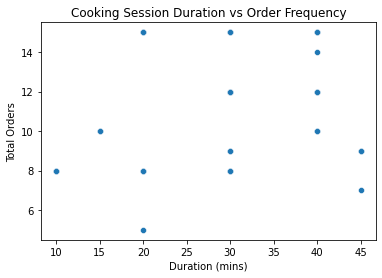

In [21]:
#Cooking Session Duration and Order Frequency
#Analyze the relationship between session duration and order frequency.

sns.scatterplot(data=merged_data, x='Duration (mins)', y='Total Orders')
plt.title('Cooking Session Duration vs Order Frequency')
plt.xlabel('Duration (mins)')
plt.ylabel('Total Orders')
plt.show()

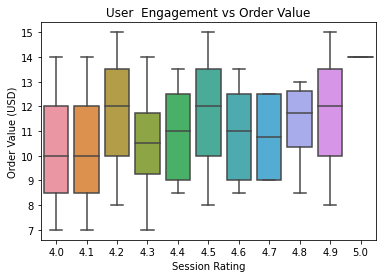

In [22]:
#User Engagement and Order Value
#Investigate how user engagement relates to order value.

sns.boxplot(data=merged_data, x='Session Rating', y='Amount (USD)')
plt.title('User  Engagement vs Order Value')
plt.xlabel('Session Rating')
plt.ylabel('Order Value (USD)')
plt.show()

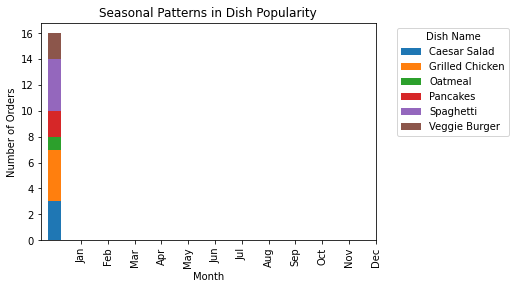

In [23]:
seasonal_dish_popularity = order_details.groupby(['Month', 'Dish Name']).size().unstack().fillna(0)
seasonal_dish_popularity.plot(kind='bar', stacked=True)
plt.title('Seasonal Patterns in Dish Popularity')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Dish Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Visualization and Reporting

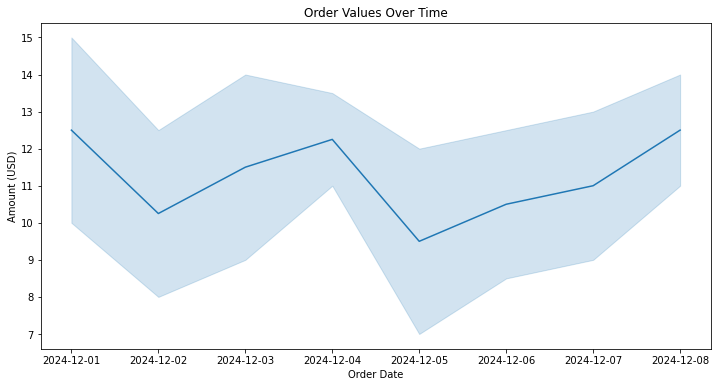

In [24]:
# Order values over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=order_details, x='Order Date', y='Amount (USD)')
plt.title('Order Values Over Time')
plt.show()
plt.close()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


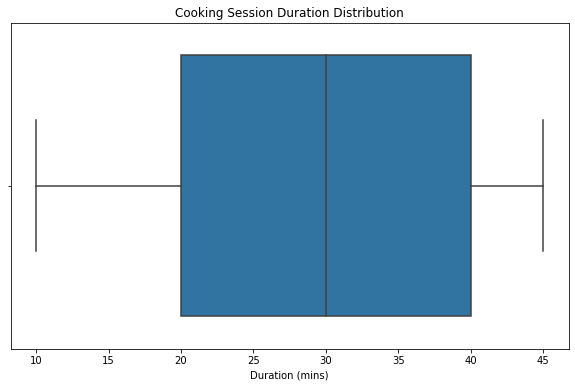

In [25]:
# Cooking session duration
plt.figure(figsize=(10, 6))
sns.boxplot(cooking_sessions['Duration (mins)'])
plt.title('Cooking Session Duration Distribution')
plt.show()
plt.close()

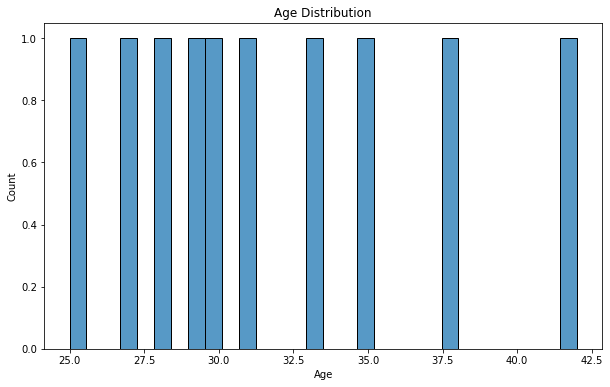

In [26]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(user_details['Age'], bins=30)
plt.title('Age Distribution')
plt.show()
plt.close()

In [27]:
#Generating Summary Statistics

#Document key statistics and insights derived from the analysis.

summary_statistics = {
    'Average Order Value': average_order_value,
    'Average Cooking Session Duration': average_duration,
    'Completion Rate': completion_rate,
    'Order Frequency per User': order_frequency_per_user
}

summary_statistics

{'Average Order Value': 11.25,
 'Average Cooking Session Duration': 30.3125,
 'Completion Rate': 1.0,
 'Order Frequency per User': 2.0}

In [28]:
#Providing Actionable Recommendations

#Based on the analysis, suggest actionable recommendations for improving user engagement and order trends.

recommendations = [
    "Increase marketing efforts for popular dishes during peak seasons.",
    "Offer cooking classes or sessions for dishes with low completion rates.",
    "Segment users based on demographics to tailor marketing strategies."
]

recommendations

['Increase marketing efforts for popular dishes during peak seasons.',
 'Offer cooking classes or sessions for dishes with low completion rates.',
 'Segment users based on demographics to tailor marketing strategies.']